# 기계학습 12주차 실습 자료
#### 조교 : 김도경

## 지난주 내용
1. 단일 하이퍼 파라메터 최적화 : validation_curve 함수 이용

- validation_curve 함수로 최적의 은닉 노드 개수 찾기
- 병렬 처리를 이용해 학습 시간 단축하기

## Tensorflow란?
- 구글에서 만든, 딥러닝 프로그램을 쉽게 구현할 수 있도록 다양한 기능을 제공해주는 라이브러리
- Tensor(텐서)란 딥러닝에서 데이터를 표현하는 방식
- 텐서는 행렬로 표현할 수 있는 2차원 형태의 배열을 높은 차원으로 확장한 다차원 배열
- 텐서 형태의 데이터들이 딥러닝 모델을 구성하는 연산들의 그래프를 따라 흐르면서 연산이 일어남
- 따라서, 딥러닝에서 데이터를 의미하는 Tensor와 DataFlow Graph를 따라 연산이 수행되는 형태(Flow)를 합쳐 TensorFlow

## Tensorflow 장점 
- 텐서보드 및 Keras와 같은 추상화 라이브러리 제공 
- 사전 학습 모델 제공 
- 간단하게 딥러닝 모델 구현 가능 

## tensorflow 동작 확인 

In [ ]:
import tensorflow as tf

print(tf.__version__)
a = tf.random.uniform([2,3],0,1) # [0,1]사이의 난수를 2*3 행렬에 생성
print(a)
print(type(a))

2.4.1
tf.Tensor(
[[0.40347195 0.22360551 0.09394634]
 [0.211797   0.6192812  0.9602276 ]], shape=(2, 3), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


## tensorflow와 numpy 호환 확인

In [ ]:
import tensorflow as tf
import numpy as np

t = tf.random.uniform([2,3],0,1)
n = np.random.uniform(0,1,[2,3])
print('tensorflow로 생성한 텐서 :\n',t,'\n')
print('numpy로 생서한 ndarray : \n',n,'\n')

res = t+n # 텐서 t와 ndarray n의 덧셈
print('덧셈 결과 : \n',res)


tensorflow로 생성한 텐서 :
 tf.Tensor(
[[0.84384465 0.17783952 0.52839565]
 [0.75955415 0.26077008 0.7387824 ]], shape=(2, 3), dtype=float32) 

numpy로 생서한 ndarray : 
 [[0.21123942 0.09966086 0.53875957]
 [0.42627991 0.02884445 0.47377121]] 

덧셈 결과 : 
 tf.Tensor(
[[1.0550841  0.2775004  1.0671552 ]
 [1.185834   0.28961453 1.2125536 ]], shape=(2, 3), dtype=float32)


# 딥러닝에서 텐서
- 다차원 배열을 텐서라 부름
    - 데이터를 텐서로 표현
    - 신경망의 가중치(매개변수)를 텐서로 표현
- 넘파이는 ndarray 클래스, 텐서플로는 Tensor 클래스로 표현. 둘은 호환됨


## tensorflow가 제공하는 데이터셋의 텐서 구조 
- MNIST, cifar10, Boston housing, Reuters 데이터셋의 텐서 구조 확인 


In [ ]:
import tensorflow as tf
import tensorflow.keras.datasets as ds

# MNIST 읽고 텐서 모양 출력
(x_train, y_train),(x_test, y_test) = ds.mnist.load_data()
yy_train = tf.one_hot(y_train,10,dtype= tf.int8) # 레이블 정보를 원핫 코드로 변환
print('MNIST: ',x_train.shape, y_train.shape,yy_train.shape)

# CIFAR-10 읽고 텐서 모양 출력
(x_train, y_train),(x_test, y_test) = ds.cifar10.load_data()
yy_train = tf.one_hot(y_train,10,dtype= tf.int8) # 원핫 코드로 변환
print('CIFAR-10: ',x_train.shape, y_train.shape,yy_train.shape)

# Boston Housing 읽고 텐서 모양 출력
(x_train, y_train),(x_test, y_test) = ds.boston_housing.load_data()
print('Boston Housing: ',x_train.shape, y_train.shape)

# Reuters 읽고 텐서 모양 출력
(x_train, y_train),(x_test, y_test) = ds.reuters.load_data()
print('Reuters: ',x_train.shape, y_train.shape)

MNIST:  (60000, 28, 28) (60000,) (60000, 10)
CIFAR-10:  (50000, 32, 32, 3) (50000, 1) (50000, 1, 10)
Boston Housing:  (404, 13) (404,)
Reuters:  (8982,) (8982,)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
# MNIST 읽고 텐서 모양 출력
(x_train, y_train),(x_test, y_test) = ds.mnist.load_data()
yy_train = tf.one_hot(y_train,10,dtype= tf.int8) # 레이블 정보를 원핫 코드로 변환
print('MNIST: ',x_train.shape, y_train.shape,yy_train.shape)
print('레이블: ', y_train[:10])
print('레이블: ', yy_train[:10])
# CIFAR-10 읽고 텐서 모양 출력
(x_train, y_train),(x_test, y_test) = ds.cifar10.load_data()
yy_train = tf.one_hot(y_train,10,dtype= tf.int8) # 원핫 코드로 변환
print('CIFAR-10: ',x_train.shape, y_train.shape,yy_train.shape)
print('레이블: ', y_train[:10])
print('레이블: ', yy_train[:10])
# Boston Housing 읽고 텐서 모양 출력
(x_train, y_train),(x_test, y_test) = ds.boston_housing.load_data()
print('Boston Housing: ',x_train.shape, y_train.shape)
print('x_train: ', x_train[:10])
print('레이블: ', y_train[:10])

MNIST:  (60000, 28, 28) (60000,) (60000, 10)
레이블:  [5 0 4 1 9 2 1 3 1 4]
레이블:  tf.Tensor(
[[0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]], shape=(10, 10), dtype=int8)
CIFAR-10:  (50000, 32, 32, 3) (50000, 1) (50000, 1, 10)
레이블:  [[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]
레이블:  tf.Tensor(
[[[0 0 0 0 0 0 1 0 0 0]]

 [[0 0 0 0 0 0 0 0 0 1]]

 [[0 0 0 0 0 0 0 0 0 1]]

 [[0 0 0 0 1 0 0 0 0 0]]

 [[0 1 0 0 0 0 0 0 0 0]]

 [[0 1 0 0 0 0 0 0 0 0]]

 [[0 0 1 0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 1 0 0]]

 [[0 0 0 0 0 0 0 0 1 0]]

 [[0 0 0 1 0 0 0 0 0 0]]], shape=(10, 1, 10), dtype=int8)
Boston Housing:  (404, 13) (404,)
x_train:  [[1.23247e+00 0.00000e+00 8.14000e+00 0.00000e+00 5.38000e-01 6.14200e+00
  9.17000e+01 3.97690e+00 4.00000e+00 3.07000e+02 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000

In [ ]:
print(np.__version__) # 현재 numpy 버전 

1.19.5


위의 warning이 발생 관련 링크 : https://github.com/josw123/dart-fss/issues/35
- NumPy 버전이 1.19 이상에서 API가 deprecated 되어서 발생하는 warning
- pandas 라이브러리에서 보고된 #35434 이슈와 관련된 것
- 사용에는 문제 없지만 NumPy 1.18.5 버전으로 다운그레이드하면 뜨지 않음 

## tensorflow 프로그래밍 : 퍼셉트론 학습
- Variable 함수는 기울기를 구하고 가중치를 갱신하는 연산을 제공 

In [ ]:
import tensorflow as tf

# OR 데이터 구축 
x = [[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y = [[-1],[1],[1],[1]]

# sklearn의 퍼셉트론 같이 구현 
w = tf.Variable([[1.0],[1.0]])
b = tf.Variable(-0.5)

# 퍼셉트론 동작 
s = tf.add(tf.matmul(x,w),b)
o = tf.sign(s)

print(o)

tf.Tensor(
[[-1.]
 [ 1.]
 [ 1.]
 [ 1.]], shape=(4, 1), dtype=float32)


In [ ]:
import tensorflow as tf

# OR 데이터 구축 
x = [[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y = [[-1],[1],[1],[1]]

# 가중치 초기화 
w = tf.Variable(tf.random.uniform([2,1],-0.5,0.5))
b = tf.Variable(tf.zeros([1]))

# 옵티마이저
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

# 전방 계산 
def forward():
  s = tf.add(tf.matmul(x,w),b)
  o = tf.tanh(s)
  return o

# 손실 함수 정의 
def loss():
  o = forward()
  return tf.reduce_mean((y-o)**2)

# 500 epoch 학습 (100 epoch 마다 학습 정보 출력)
for i in range(500):
  opt.minimize(loss,var_list=[w,b])
  if(i%100==0) : 
    print('loss at epoch',i,'=',loss().numpy())
  
# 학습된 퍼셉트론으로 OR 데이터를 예측 
o = forward()
print(o)

loss at epoch 0 = 0.51120985
loss at epoch 100 = 0.08469668
loss at epoch 200 = 0.04053233
loss at epoch 300 = 0.025840363
loss at epoch 400 = 0.01874524
tf.Tensor(
[[-0.8178004 ]
 [ 0.8872739 ]
 [ 0.8872468 ]
 [ 0.99928486]], shape=(4, 1), dtype=float32)


- 학습을 마친 모델로 예측 수행 
- 4개 샘플 모두 옳게 분류 

## Keras 사용하기
- tensorflow.keras
  - tensorflow의 하위 클래스로 tensorflow 버전 2부터 편입됨 
- keras 클래스의 중요한 세 가지 하위 클래스 
  - models : Sequential과 functional API 모델 제작 방식 제공 
  - layers : 다양한 종류의 층 제공 
  - optimizers: 다양한 종류의 옵티마이저 제공 
- 신경망의 동작을 직접 구현하지 않아도 됨 

## 케라스 프로그래밍 : 퍼셉트론 학습
- 데이터 구축 -> 신경망 구조 설계 -> 학습 -> 예측

In [ ]:
from tensorflow.keras.models import Sequential # 층을 한 줄로 쌓는데 사용 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# OR 데이터 구축 
x = [[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y = [[-1],[1],[1],[1]]

# 신경망 구조 설계 
n_input = 2
n_output = 1
perceptron = Sequential() # Sequential 클래스로 객체를 생성
perceptron.add(Dense(units = n_output, activation='tanh', input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))

# 신경망 학습
perceptron.compile(loss='mse',optimizer = SGD(learning_rate=0.1),metrics=['mse'])
perceptron.fit(x,y,epochs=500,verbose=2)

# 학습된 신경망으로 예측
res = perceptron.predict(x)
print(res)

Epoch 1/500
1/1 - 0s - loss: 0.9940 - mse: 0.9940
Epoch 2/500
1/1 - 0s - loss: 0.7468 - mse: 0.7468
Epoch 3/500
1/1 - 0s - loss: 0.6385 - mse: 0.6385
Epoch 4/500
1/1 - 0s - loss: 0.5853 - mse: 0.5853
Epoch 5/500
1/1 - 0s - loss: 0.5531 - mse: 0.5531
Epoch 6/500
1/1 - 0s - loss: 0.5300 - mse: 0.5300
Epoch 7/500
1/1 - 0s - loss: 0.5113 - mse: 0.5113
Epoch 8/500
1/1 - 0s - loss: 0.4951 - mse: 0.4951
Epoch 9/500
1/1 - 0s - loss: 0.4803 - mse: 0.4803
Epoch 10/500
1/1 - 0s - loss: 0.4666 - mse: 0.4666
Epoch 11/500
1/1 - 0s - loss: 0.4536 - mse: 0.4536
Epoch 12/500
1/1 - 0s - loss: 0.4411 - mse: 0.4411
Epoch 13/500
1/1 - 0s - loss: 0.4291 - mse: 0.4291
Epoch 14/500
1/1 - 0s - loss: 0.4176 - mse: 0.4176
Epoch 15/500
1/1 - 0s - loss: 0.4065 - mse: 0.4065
Epoch 16/500
1/1 - 0s - loss: 0.3957 - mse: 0.3957
Epoch 17/500
1/1 - 0s - loss: 0.3854 - mse: 0.3854
Epoch 18/500
1/1 - 0s - loss: 0.3754 - mse: 0.3754
Epoch 19/500
1/1 - 0s - loss: 0.3657 - mse: 0.3657
Epoch 20/500
1/1 - 0s - loss: 0.3564 - m

## 다층 퍼셉트론으로 MNIST 데이터를 인식하는 프로그래밍
- 단계 1: 데이터 준비 

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential # 층을 한 줄로 쌓는데 사용 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# MNIST 읽어 와서 신경망에 입력할 형태로 변환 
(x_train, y_train), (x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784) # reshape 함수로 2차원 구조의 텐서를 1차원 구조로 변환 
x_test = x_test.reshape(10000,784)
x_train = x_train.astype(np.float32)/255.0 # float 32 데이터형으로 변환하고 [0,255] 범위를 [0,1] 범위로 정규화
x_test=x_test.astype(np.float32)/255.0 # ndarray로 변환 
y_train = tf.keras.utils.to_categorical(y_train,10) # 레이블을 원핫 코드로 변환 
y_test = tf.keras.utils.to_categorical(y_test,10)


11493376/11490434 [==============================] - 0s 0us/step


- 단계 2 : 신경망 구조 설계
  - 신경망의 입력층, 은닉층, 출력층의 노드 개수 설정 
  - Sequential 모델을 생성하여 mlp 객체에 저장 
  - 은닉층을 추가 (input_shape은 입력층, units은 현재 쌓고 있는 은닉층으로 설정) 
  - 출력층을 추가 (input_shape은 생략 가능, units은 현재 쌓고 있는 출력층으로 설정) 

In [3]:
n_input = 784
n_hidden=1024
n_output=10

mlp = Sequential()
mlp.add(Dense(units = n_hidden, activation='tanh', input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units = n_output, activation='tanh', kernel_initializer='random_uniform',bias_initializer='zeros'))

- 단계 3 : 신경망 학습 
  - compile 함수로 학습을 준비함 (loss 매개변수는 손실함수, optimizers는 옵티마이저 설정) 
  - fit 함수는 실제 학습을 수행(batch_size는 미니배치 크기, epochs는 최대 학습수, validation_data는 학습 도중에 사용할 검증 집합 설정)

- 단계 4 : 예측
  - evaluate 함수로 accuracy 측정 

In [4]:
# 신경망 학습
mlp.compile(loss='mean_squared_error',optimizer = Adam(learning_rate=0.001),metrics=['accuracy'])
hist = mlp.fit(x_train,y_train,batch_size = 128, epochs=30,validation_data = (x_test,y_test),verbose=2)

# 학습된 신경망으로 예측
res = mlp.evaluate(x_test,y_test,verbose = 0)
print('accuracy = ',res[1]*100)

Epoch 1/30
469/469 - 5s - loss: 0.0420 - accuracy: 0.8471 - val_loss: 0.0270 - val_accuracy: 0.9151
Epoch 2/30
469/469 - 4s - loss: 0.0222 - accuracy: 0.9315 - val_loss: 0.0194 - val_accuracy: 0.9426
Epoch 3/30
469/469 - 4s - loss: 0.0166 - accuracy: 0.9492 - val_loss: 0.0147 - val_accuracy: 0.9538
Epoch 4/30
469/469 - 4s - loss: 0.0137 - accuracy: 0.9581 - val_loss: 0.0128 - val_accuracy: 0.9598
Epoch 5/30
469/469 - 4s - loss: 0.0121 - accuracy: 0.9642 - val_loss: 0.0122 - val_accuracy: 0.9626
Epoch 6/30
469/469 - 4s - loss: 0.0109 - accuracy: 0.9681 - val_loss: 0.0115 - val_accuracy: 0.9655
Epoch 7/30
469/469 - 4s - loss: 0.0101 - accuracy: 0.9713 - val_loss: 0.0106 - val_accuracy: 0.9670
Epoch 8/30
469/469 - 4s - loss: 0.0095 - accuracy: 0.9739 - val_loss: 0.0108 - val_accuracy: 0.9683
Epoch 9/30
469/469 - 4s - loss: 0.0089 - accuracy: 0.9758 - val_loss: 0.0098 - val_accuracy: 0.9693
Epoch 10/30
469/469 - 4s - loss: 0.0085 - accuracy: 0.9776 - val_loss: 0.0091 - val_accuracy: 0.9709

## 실행 결과 
- 테스트 집합에 대해 97.79% accuracy 

## 학습 곡선 시각화 
- hist 객체가 가진 정보를 이용하여 학습 곡선을 그림 

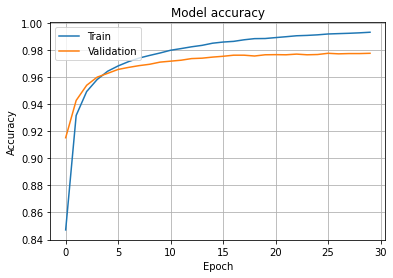

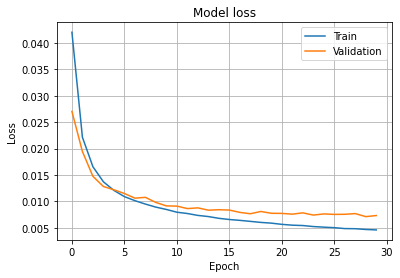

In [5]:
import matplotlib.pyplot as plt

# accuracy 곡선 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc = 'upper right')
plt.grid()
plt.show()

## matplotlib을 이용한 시각화 
- 파이썬에서 가장 널리쓰이는 시각화 라이브러리
- https://matplotlib.org/users